<h1 style="text-align: center;"> Influencer Sales Data Analysis </h1>

# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading Data

In [2]:
df = pd.read_csv(r"D:\projects\dc\merch_sales.csv")
df

,Order ID,Order Date,Product ID,Product Category,Buyer Gender,Buyer Age,Order Location,International Shipping,Sales Price,Shipping Charges,Sales per Unit,Quantity,Total Sales,Rating,Review
0,189440,2024-07-21,BF1543,Clothing,Male,30,New Jersey,No,100,0,100,1,100,4,The delivery team handled the product with care.
1,187385,2024-07-20,BF1543,Clothing,Male,32,Las Vegas,No,100,0,100,1,100,3,Had slight delays but the product was in good ...
2,181844,2024-07-21,BF1544,Other,Female,26,Cardiff,Yes,9,40,49,1,49,2,Waste of Money.
3,197934,2024-08-19,BF1544,Other,Male,28,Pittsburgh,No,9,0,9,2,18,3,Had slight delays but the product was in good ...
4,122470,2024-01-06,BF1545,Other,Female,19,Miami,No,10,0,10,3,30,5,Lack of delivery delays is greatly appreciated.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7389,136943,2023-12-10,BF1548,Clothing,Male,23,Las Vegas,No,65,0,65,1,65,4,The product was affordable here compared to ot...
7390,172276,2024-01-24,BF1546,Clothing,Female,26,Manchester,Yes,118,40,158,1,158,4,Exquisite craftsmanship here is absolutely app...
7391,160191,2023-12-19,BF1552,Ornaments,Male,19,Miami,No,45,0,45,1,45,2,Waste of Money.
7392,195268,2023-12-07,BF1555,Other,Male,34,Miami,No,23,0,23,1,23,5,The product was affordable here compared to ot...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7394 entries, 0 to 7393
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                7394 non-null   int64 
 1   Order Date              7394 non-null   object
 2   Product ID              7394 non-null   object
 3   Product Category        7394 non-null   object
 4   Buyer Gender            7394 non-null   object
 5   Buyer Age               7394 non-null   int64 
 6   Order Location          7394 non-null   object
 7   International Shipping  7394 non-null   object
 8   Sales Price             7394 non-null   int64 
 9   Shipping Charges        7394 non-null   int64 
 10  Sales per Unit          7394 non-null   int64 
 11  Quantity                7394 non-null   int64 
 12  Total Sales             7394 non-null   int64 
 13  Rating                  7394 non-null   int64 
 14  Review                  7394 non-null   object
dtypes: i

In [4]:
df.isnull().sum()

Order ID                  0
Order Date                0
Product ID                0
Product Category          0
Buyer Gender              0
Buyer Age                 0
Order Location            0
International Shipping    0
Sales Price               0
Shipping Charges          0
Sales per Unit            0
Quantity                  0
Total Sales               0
Rating                    0
Review                    0
dtype: int64

In [5]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe()

,Order ID,Buyer Age,Sales Price,Shipping Charges,Sales per Unit,Quantity,Total Sales,Rating
count,7394.00,7394.00,7394.00,7394.00,7394.00,7394.00,7394.00,7394.00
mean,159735.13,26.46,55.17,14.63,69.80,1.67,115.83,3.50
std,23040.25,5.21,39.58,24.82,46.70,1.08,118.07,1.39
min,120005.00,18.00,9.00,0.00,9.00,1.00,9.00,1.00
25%,139895.75,22.00,15.00,0.00,20.00,1.00,40.00,3.00
50%,159577.50,26.00,65.00,0.00,65.00,1.00,90.00,4.00
75%,179869.75,31.00,97.00,40.00,100.00,2.00,137.00,5.00
max,199994.00,35.00,130.00,100.00,230.00,5.00,1000.00,5.00


In [6]:
df.nunique()

Order ID                  7394
Order Date                 366
Product ID                  13
Product Category             3
Buyer Gender                 2
Buyer Age                   18
Order Location              25
International Shipping       2
Sales Price                 13
Shipping Charges             6
Sales per Unit              62
Quantity                     5
Total Sales                195
Rating                       5
Review                      29
dtype: int64

# EDA (Exploratory Data Analysis)

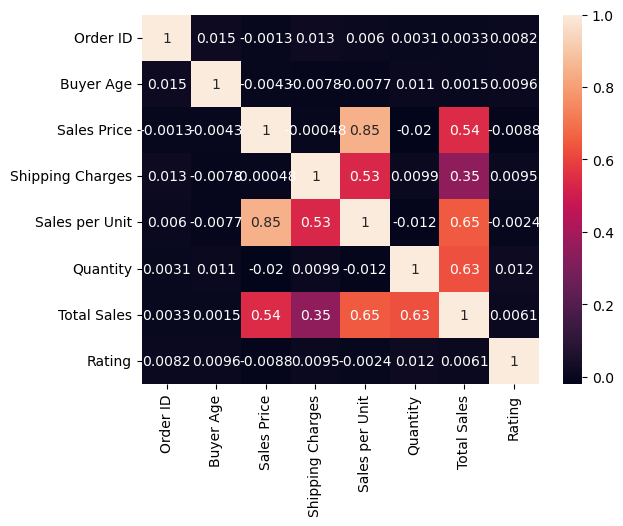

In [7]:
sns.heatmap(df.corr(numeric_only=True), annot = True)
plt.rcParams['figure.figsize'] = (20,7)

plt.show()

The correlation coefficient shows there is not much relation between most of the variables, but it does shine some light upon some, like the correlation between Sales Prices and Sales per Unit, with a smaller relationship between Sales Prices and Total Sales. 

In [8]:
df.groupby('Product ID').mean(numeric_only=True)
dfProductID = df.drop(columns=['Order ID'])
dfProductID = dfProductID.groupby('Product ID').agg({'Sales Price': 'mean',
    'Shipping Charges': 'mean',
    'Sales per Unit': 'mean',
    'Quantity': 'sum',
    'Total Sales': 'sum',
    'Rating': 'mean',
    'Buyer Age': 'mean'
    })
dfProductID.transpose()

Product ID,BF1543,BF1544,BF1545,BF1546,BF1547,BF1548,BF1549,BF1550,BF1551,BF1552,BF1553,BF1554,BF1555
Sales Price,100.00,9.00,10.00,118.00,32.00,65.00,130.00,97.00,15.00,45.00,50.00,20.00,23.00
Shipping Charges,17.32,13.76,15.20,15.84,14.31,13.88,12.24,13.65,15.30,15.51,14.82,14.79,13.23
Sales per Unit,117.32,22.76,25.20,133.84,46.31,78.88,142.24,110.65,30.30,60.51,64.82,34.79,36.23
Quantity,1220.00,1219.00,1023.00,555.00,562.00,2421.00,628.00,1273.00,1586.00,503.00,362.00,755.00,227.00
Total Sales,144395.00,28161.00,26630.00,73685.00,26554.00,190640.00,88790.00,139691.00,47660.00,31015.00,23505.00,27070.00,8666.00
Rating,3.53,3.57,3.60,3.42,3.45,3.50,3.38,3.57,3.42,3.42,3.45,3.51,3.57
Buyer Age,26.54,26.56,26.39,26.46,26.42,26.40,26.29,26.50,26.68,26.28,26.46,26.18,26.39


## Stats by Product ID

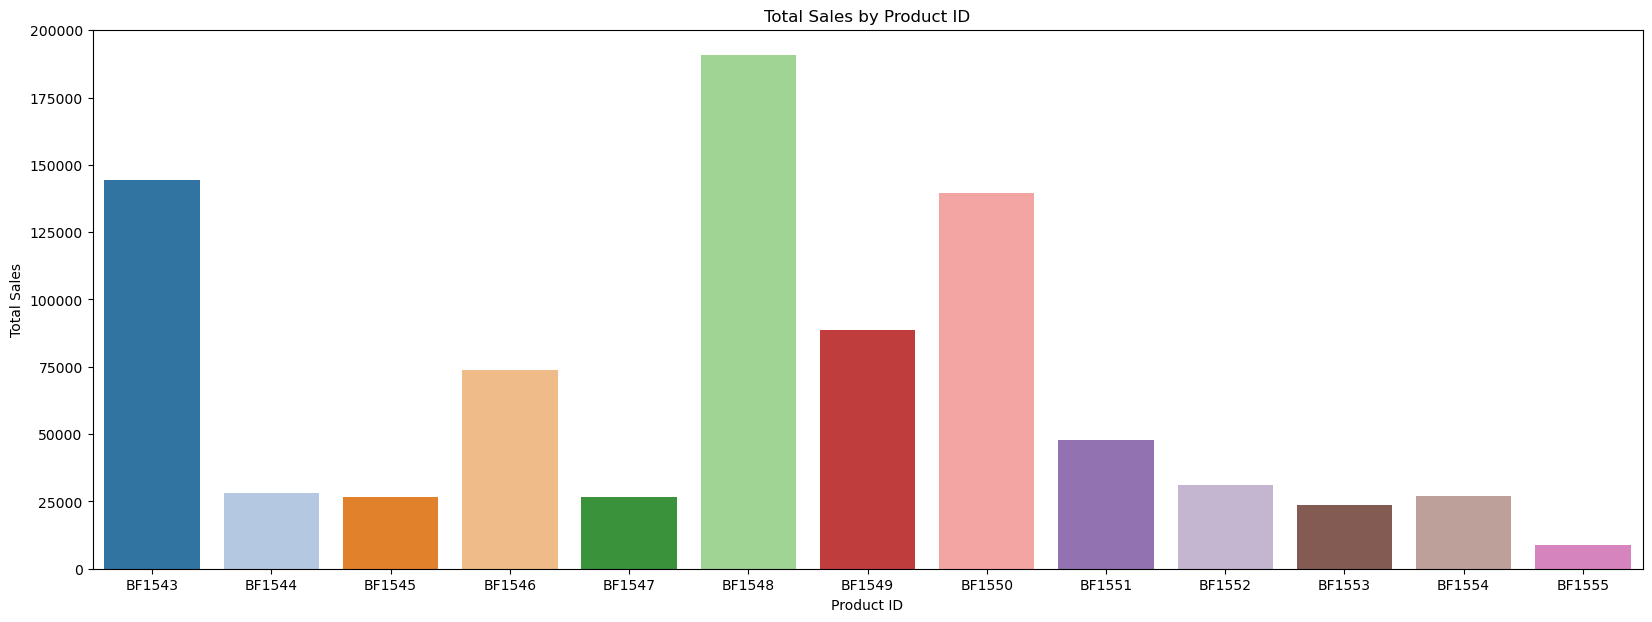

In [9]:
#dfProductID['Total Sales'].plot(kind='bar', figsize = (20,7))

plt.figure(figsize=(20,7))
sns.barplot(data= dfProductID,
            x = dfProductID.index,
            y = 'Total Sales',
            hue = dfProductID.index,
            legend = False,
            palette='tab20')
plt.title('Total Sales by Product ID')
plt.show()

As depicted, the 5 products which have sold the most, are in order, BF1548, BF1543, BF1550, BF1549 and BF1546

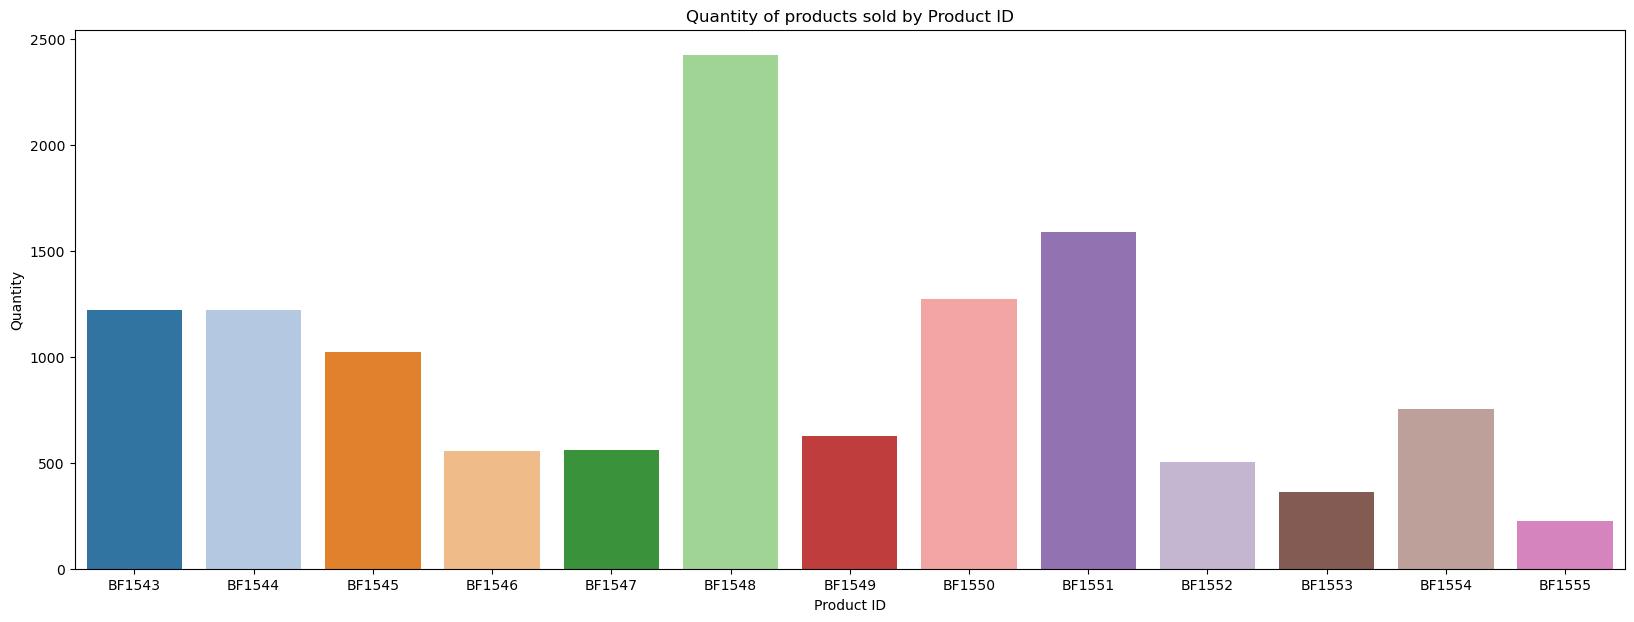

In [10]:
#dfProductID['Quantity'].plot(kind='bar', figsize = (20,7))

plt.figure(figsize=(20,7))
sns.barplot(data= dfProductID,
            x = dfProductID.index,
            y = 'Quantity',
            hue = dfProductID.index,
            legend = False,
            palette='tab20')
plt.title('Quantity of products sold by Product ID')
plt.show()

As for the quantity each product sold, it keeps a similar trend compared to the previous chart, where notoriously BF1551 went from being the 6th with most sales in total, to being the 2nd with the most units sold.

<Axes: xlabel='Product ID'>

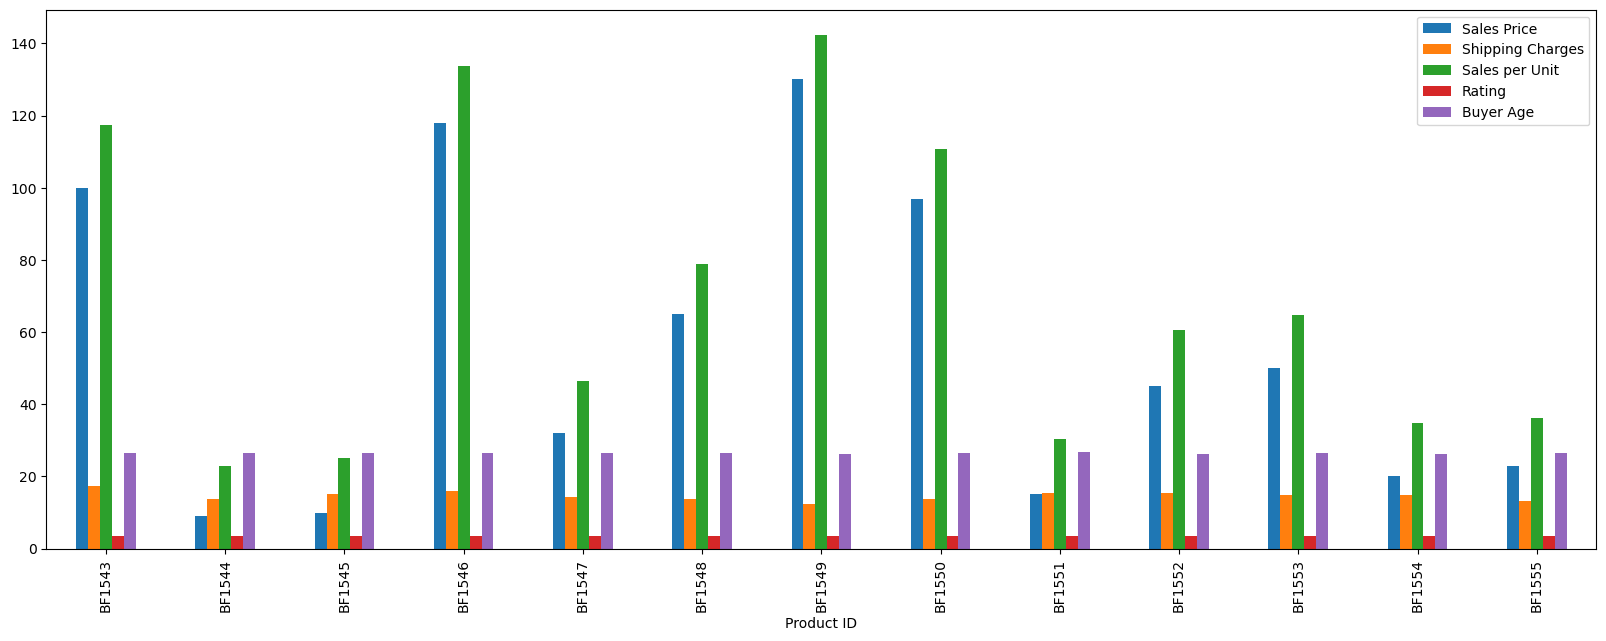

In [11]:
dfProductID.drop(columns=['Total Sales', 'Quantity']).plot(kind = 'bar')

This chart depicts the visualization of the rest of the stats relative to each product, their sales price, shipping charges, sales per unit, rating, and the age of the buyer, very self explanatory.

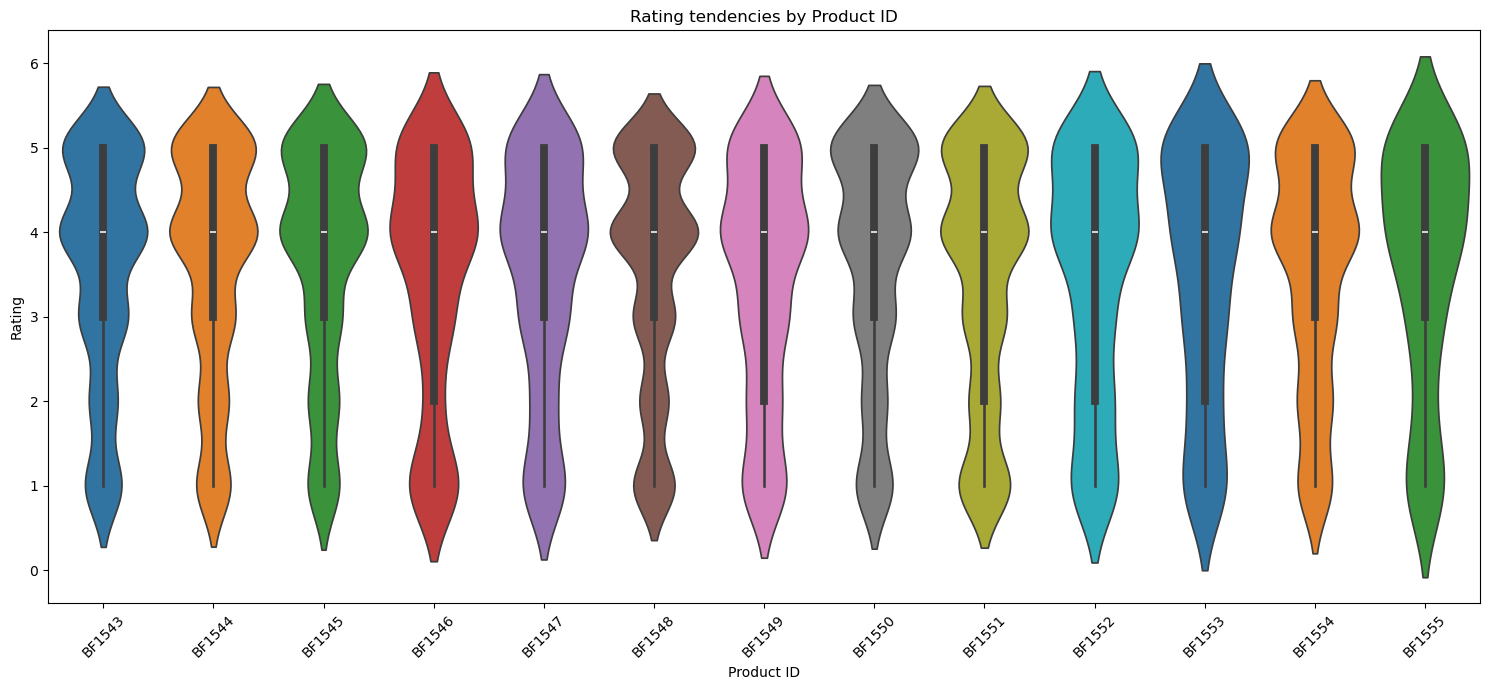

In [12]:
plt.figure(figsize=(15,7))
sns.violinplot(data=df, x='Product ID', y='Rating', hue='Product ID', 
              palette='tab10')
plt.xticks(rotation=45)
plt.title('Rating tendencies by Product ID')
plt.tight_layout()
plt.show()

Violin plot depicting the tendencies of the rating each product received. The density curves help see the distribution of the reviews for each one.

## Stats by Product Category

In [13]:
dfProductCat = df.drop(columns=['Order ID'])
dfProductCat = dfProductCat.groupby('Product Category').agg({'Sales Price': 'mean',
    'Shipping Charges': 'mean',
    'Sales per Unit': 'mean',
    'Quantity': 'sum',
    'Total Sales': 'sum',
    'Rating': 'mean',
    'Buyer Age': 'mean'
    })

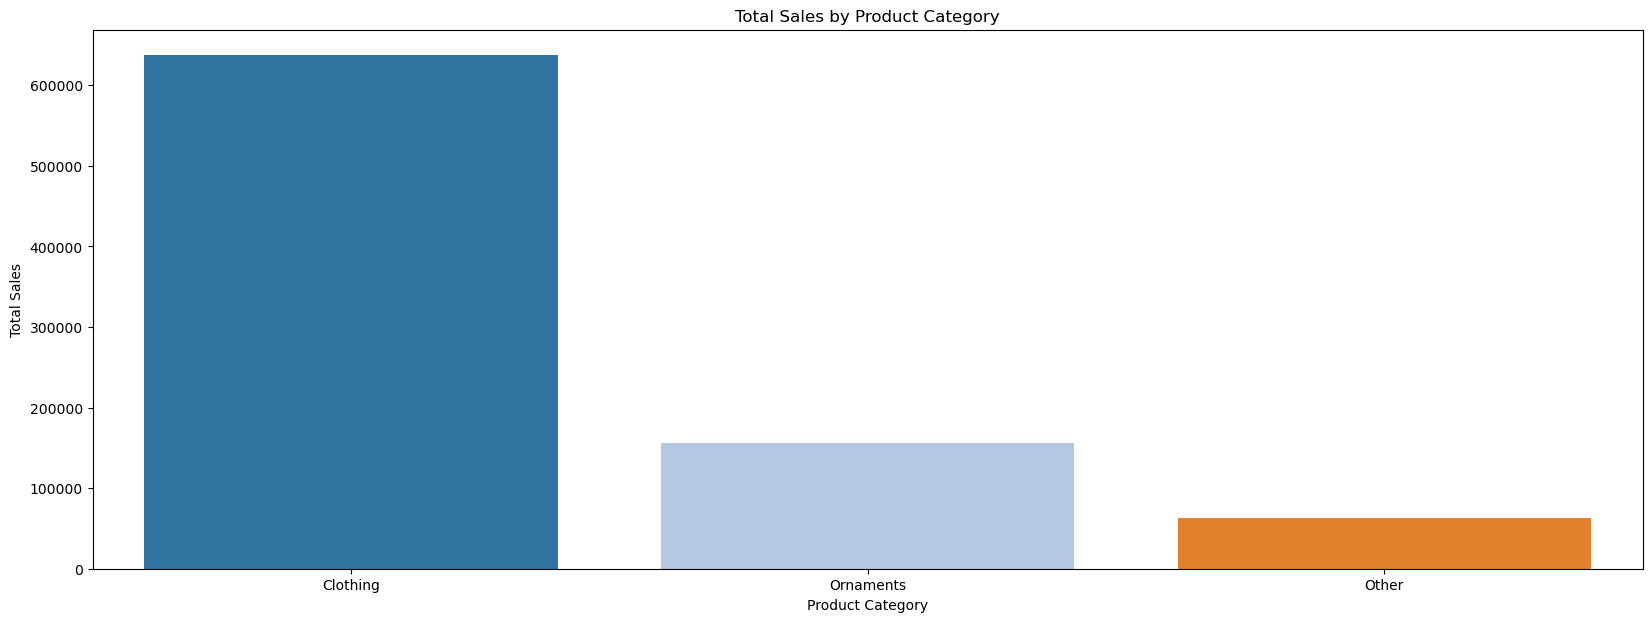

In [14]:
#dfProductCat['Total Sales'].plot(kind='bar')

plt.figure(figsize=(20,7))
sns.barplot(data= dfProductCat,
            x = dfProductCat.index,
            y = 'Total Sales',
            hue = dfProductCat.index,
            legend = False,
            palette='tab20')
plt.title('Total Sales by Product Category')
plt.show()

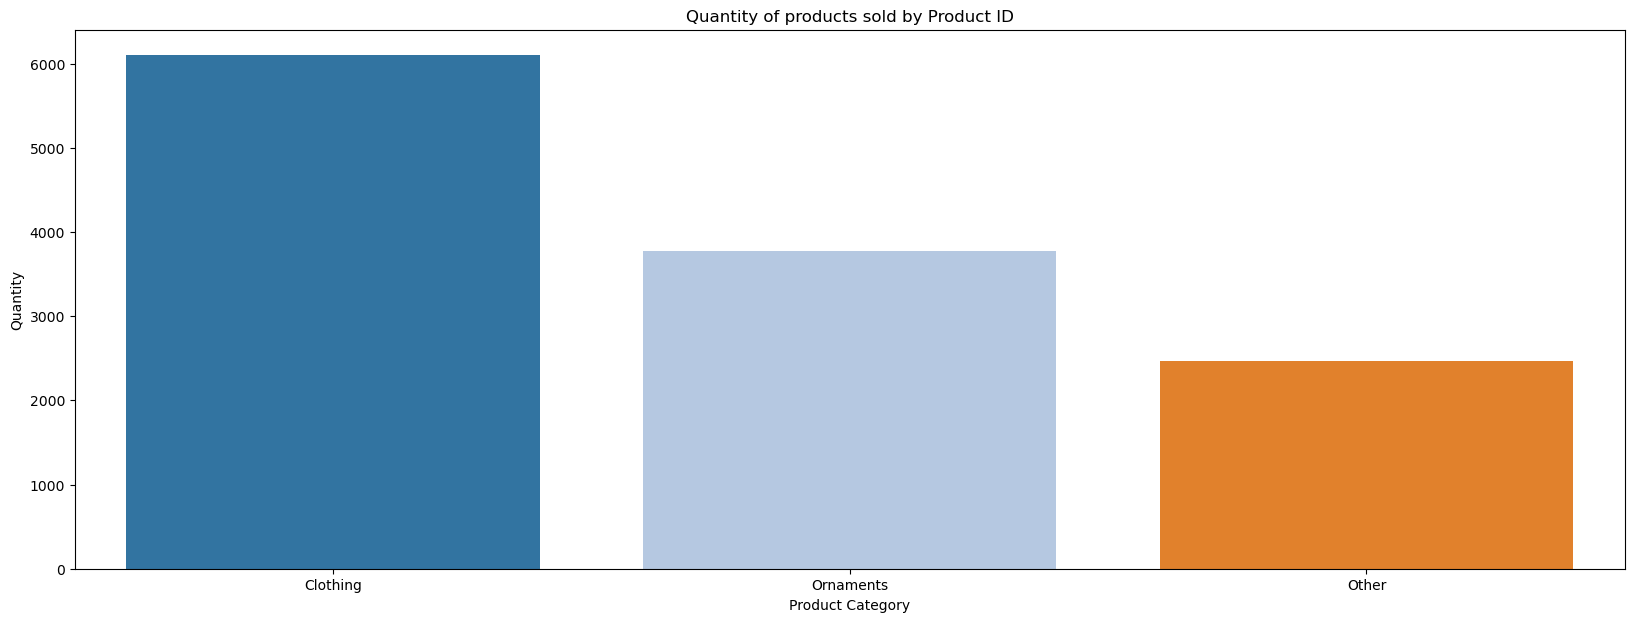

In [15]:
#dfProductCat['Quantity'].plot(kind='bar')
plt.figure(figsize=(20,7))
sns.barplot(data= dfProductCat,
            x = dfProductCat.index,
            y = 'Quantity',
            hue = dfProductCat.index,
            legend = False,
            palette='tab20')
plt.title('Quantity of products sold by Product ID')
plt.show()

## Demographic tendencies

In [16]:
#Separation of the Buyer Age values into split groups.
df['Age Group'] = pd.cut(df['Buyer Age'], 
                        bins=[0, 20, 30, 40],
                        labels=['Under 20', '20-30', '31-40'])

#Count of products purchased by age group and gender
dfProductDemographics = df.groupby(['Age Group', 'Buyer Gender', 'Product ID'], observed = True)['Order ID'].count().reset_index()
dfProductDemographics = dfProductDemographics.rename(columns={'Order ID': 'Purchase Count'})

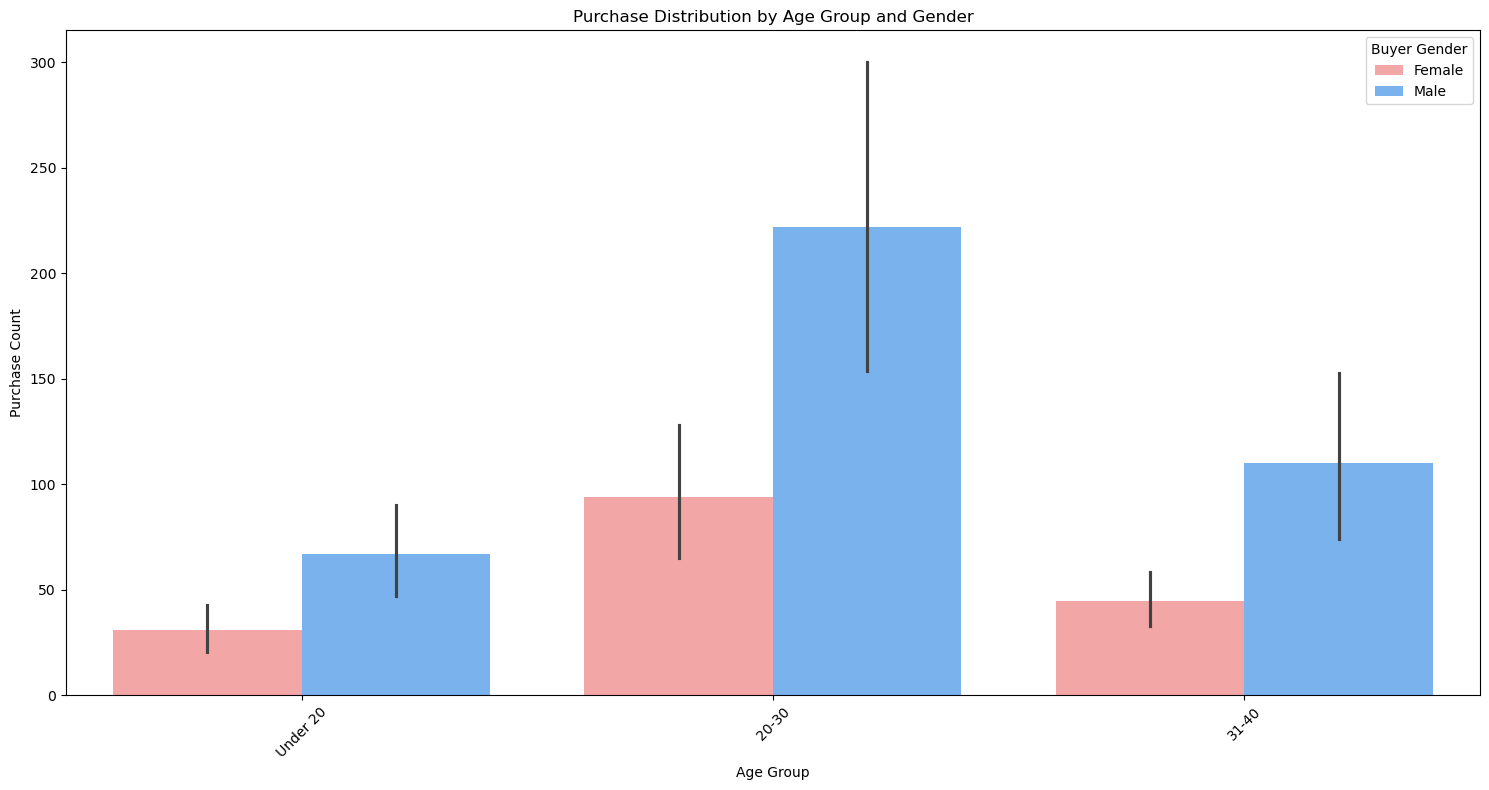

In [17]:
plt.figure(figsize=(15, 8))
sns.barplot(data=dfProductDemographics,
            x='Age Group',
            y='Purchase Count',
            hue='Buyer Gender',
            palette=['#FF9999', '#66B2FF'])

plt.title('Purchase Distribution by Age Group and Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

According to the previous plot, most of the clients of the business are males, most of them being in their 20s.

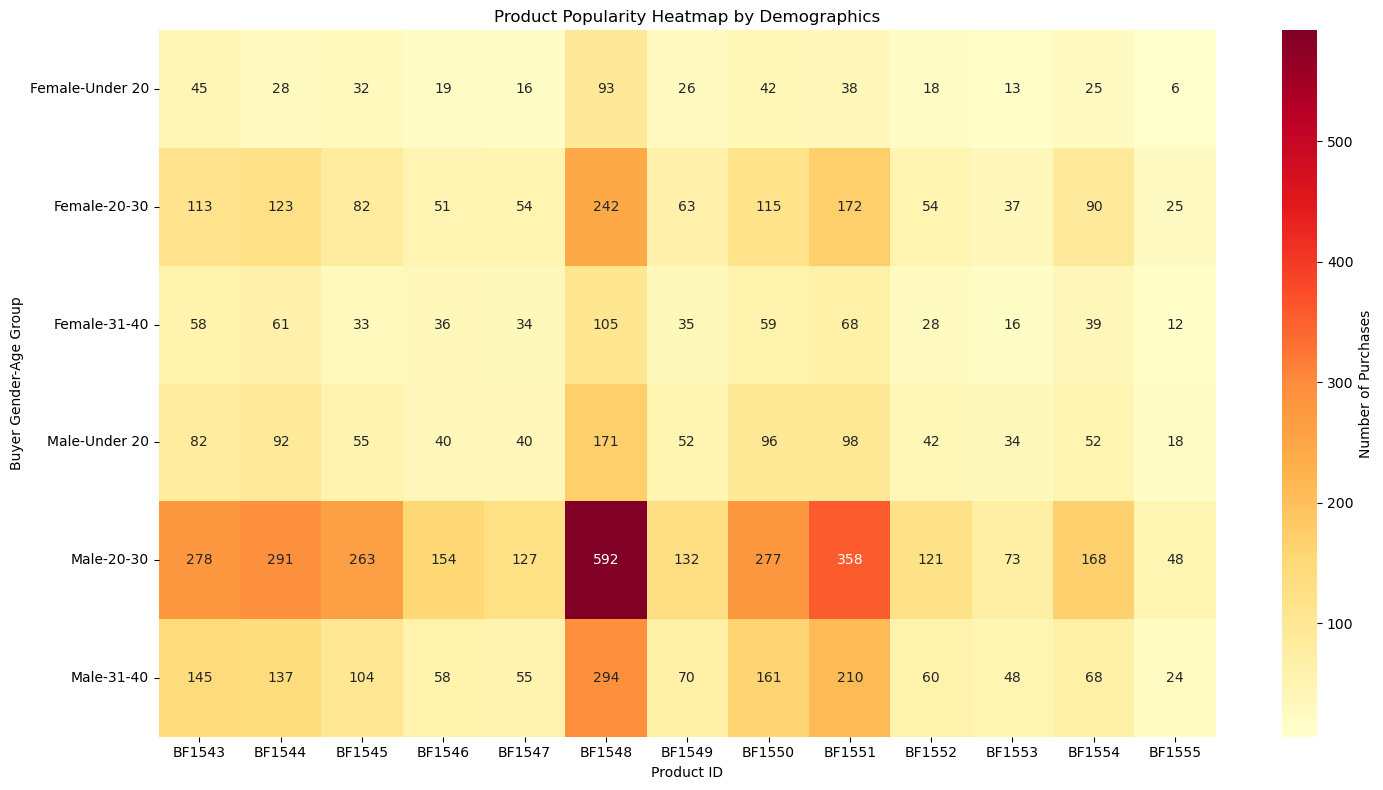

In [18]:
heatmap_data = dfProductDemographics.pivot_table(
    values='Purchase Count',
    index=['Buyer Gender', 'Age Group'],
    columns='Product ID',
    fill_value=0,
    observed = False
)

plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, 
            annot=True,          # Show values in cells 
            fmt='g',             # Format as general number
            cmap='YlOrRd',       # Yellow to Orange to Red color scheme
            cbar_kws={'label': 'Number of Purchases'})

plt.title('Product Popularity Heatmap by Demographics')
plt.tight_layout()
plt.show()

This heatmap helps us see the trends regarding what product is bought the most by a certain demographic group. Being BF1548 the most popular item, preferred by both females and males. It can also be observed that certain products get less popular than others as the demographic changes, take for example BF1543, where it's less popular than BF1544 in the male group under 20, but this is the inverse for males in their 30s.

## Trends by date

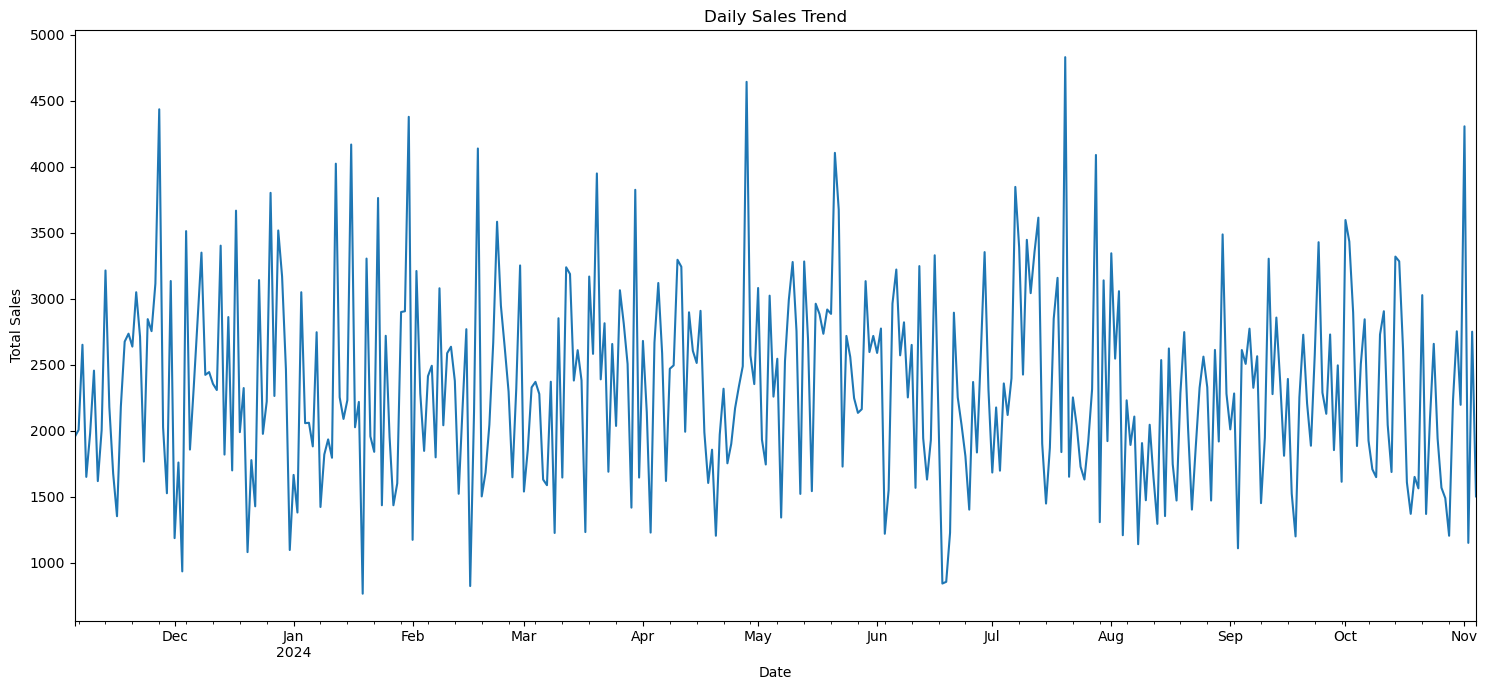

In [19]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

plt.figure(figsize=(15,7))
df.groupby('Order Date')['Total Sales'].sum().plot(kind='line')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()



The data reveals some trends and patterns which correlate with sales data from other studies, showing a picture of consumer behaviour cycles.
Holiday season starts with a large surge in late November, while December shows a slow down on sales at the very start of the month following the previous spike, before restabilizing until a noticeable mid-month lull, right before sales rebound during christmas season. As expected, this phenomenon is followed by a decline in consumption post-holiday.

As the year begins, the end of christmas and the arrival of the new year leaves us with a very volatile January, which starts slowly, with sporadic sales spikes while also recording the year's lowest performing day. February maintaints some of this volatility, while March starts showing signs of stability. This pattern might reflect post-holiday budget consciousness among consumers, combined with varying success of new year promotions.

Spring brings its own character to sales patterns. April experiences a remarkable contrast, with a significant slowdown in the latter weeks before ending with a strong upward surge. May through early June demonstrate relative stability, suggesting steady consumer behavior during this period.

Mid-year presents some of our most dramatic variations. June shows a concerning downward trend, including a depression of sales which lasts a couple days. However, July compensates with our highest single-day sales record for the year, though this momentum doesn't carry through to the month's end.

The August to October period represents our most stable quarter, with sales maintaining consistent levels without significant fluctuations. This stability breaks with November's arrival, where we again see substantial sales growth as the holiday season approaches, completing the annual cycle.

- Peak Performance: July records the highest single-day sales
- Critical Low: January marks the lowest sales day
- Most Stable Period: August through mid November.
- Most Volatile Periods: Late November through December, and June-July transition
- Predictable Patterns: Strong holiday season performance with characteristic mid-December dip.


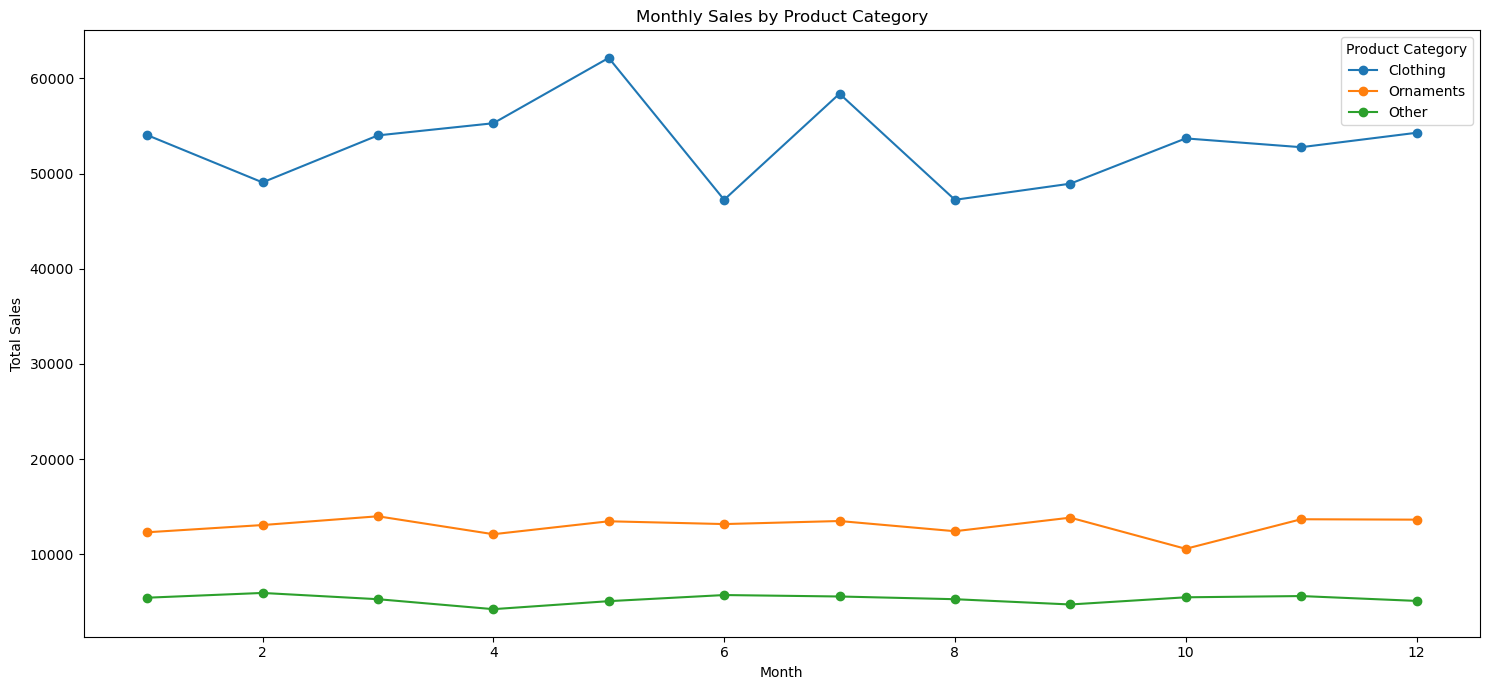

In [20]:
#Monthly sales by product category
df['Month'] = df['Order Date'].dt.month
monthly_sales = df.groupby(['Month', 'Product Category'])['Total Sales'].sum().unstack()
monthly_sales.plot(kind='line', marker='o', figsize=(15,7))
plt.title('Monthly Sales by Product Category')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

The Clothes category present an interesting phenomenon, where there is a valley comprised of the two months with most sales, with the one with the least in between them.

Meanwhile, the other two categories, Ornaments and Others, present a stable behaviour across the year, with the only notorious point of interest being a small dip in the Ornaments sales at month 10.

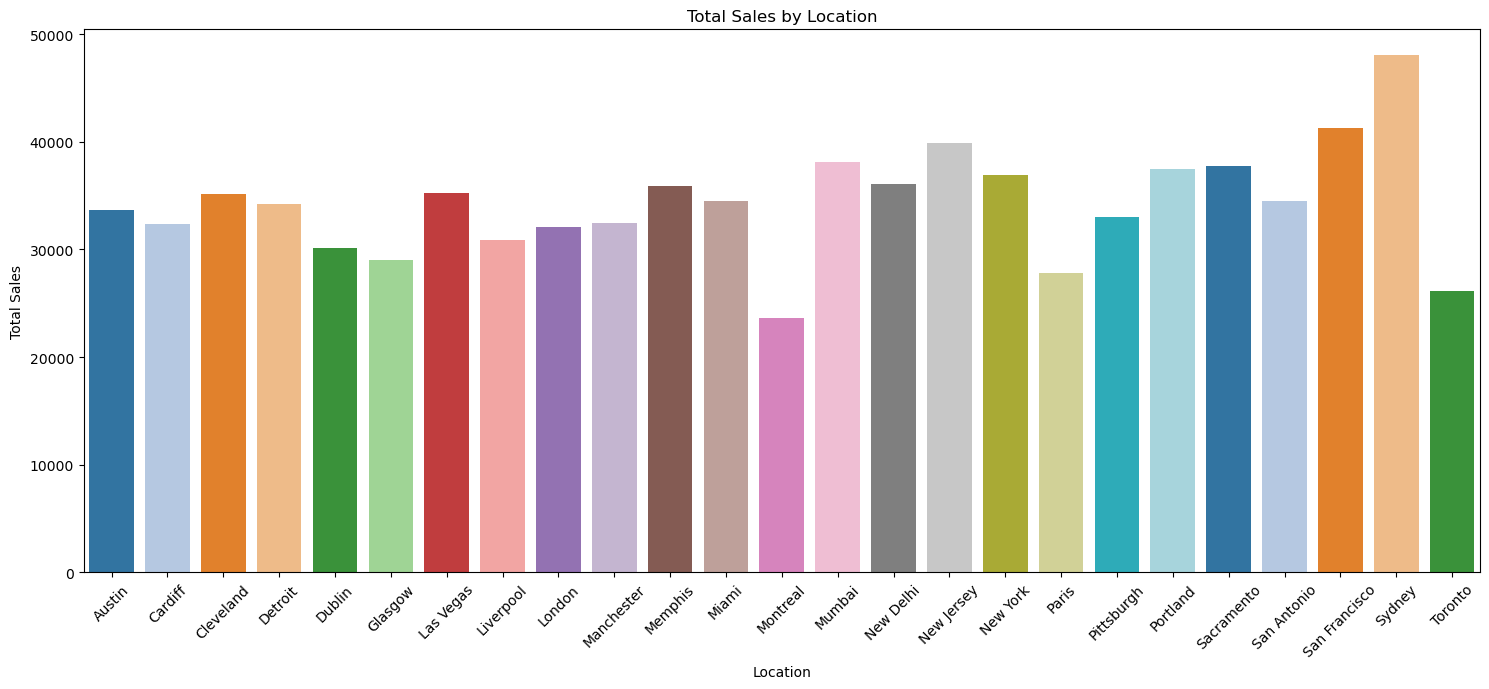

In [21]:
dfLocationSales = df.groupby('Order Location')['Total Sales'].sum().reset_index()
plt.figure(figsize=(15,7))
sns.barplot(data = dfLocationSales,
            x = 'Order Location',
            y = 'Total Sales',
            hue = 'Order Location',
            legend = False, 
            palette = 'tab20')
plt.title('Total Sales by Location')
plt.xlabel('Location')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The sales distribution across locations reveals noteworthy insight. For a business based in the USA, the top-performing market is found in Sydney, Australia, while Mumbai, India also finds itself as one of the top five.
Meanwhile, the other 3 spots in the top 5 are reserved for american cities, San Francisco, New Jersey and Sacramento.

In order, the top 5 of most sales by location is:
- Sydney, Australia
- San Francisco, USA
- New Jersey, USA
- Mumbai, India
- Sacramento, USA

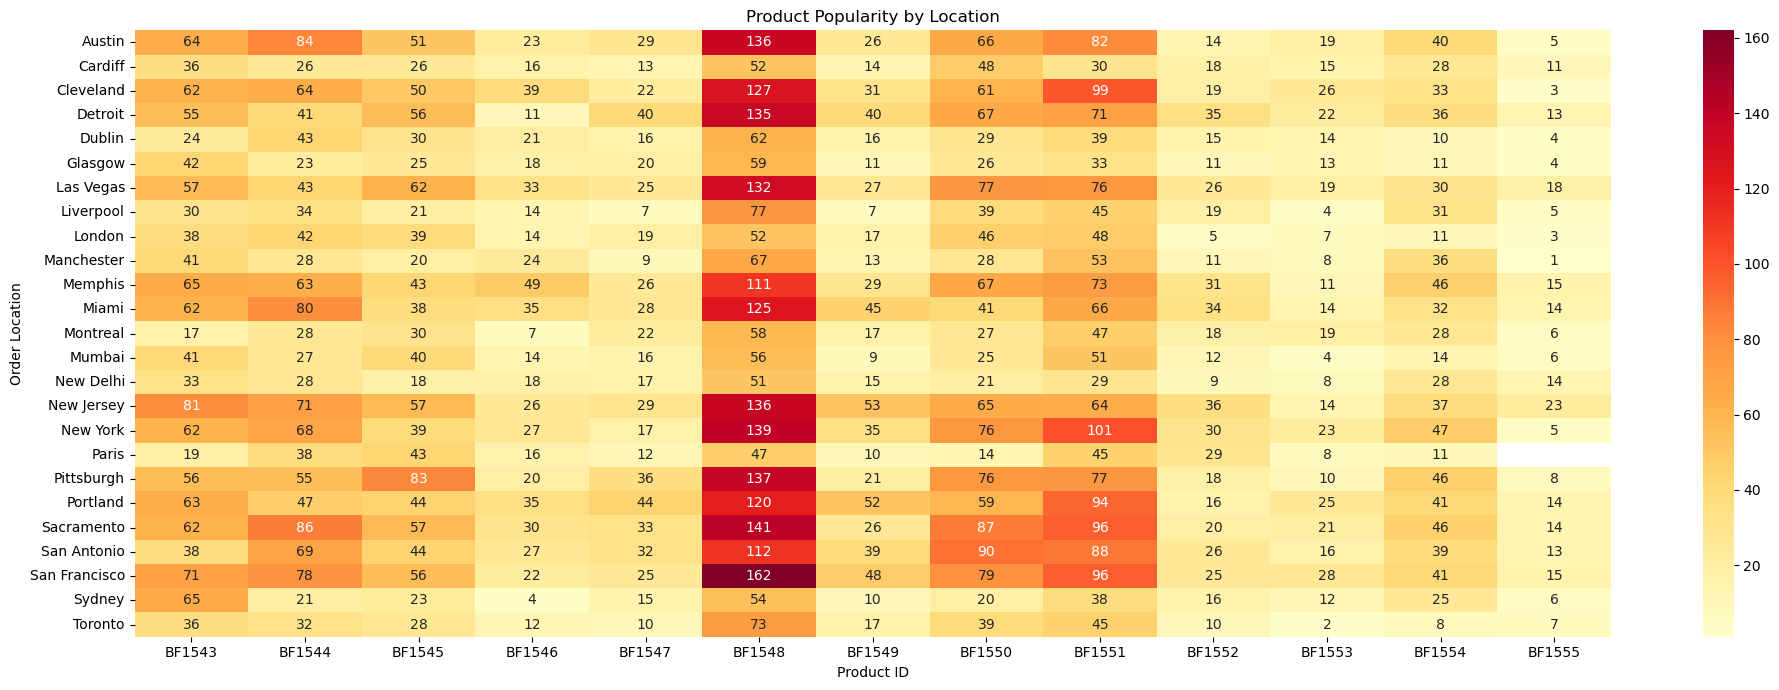

In [22]:
location_products = df.groupby(['Order Location', 'Product ID'])['Quantity'].sum().unstack()
sns.heatmap(location_products, cmap='YlOrRd', annot=True, fmt ="g")
plt.title('Product Popularity by Location')
plt.tight_layout()
plt.show()

Using the heatmap to highlight regional clusters of product popularity can help in supply chain optimization to meet localized demand effectively.
(For example, ship more BF1551 to warehouses in New York, and less to Sydney.)

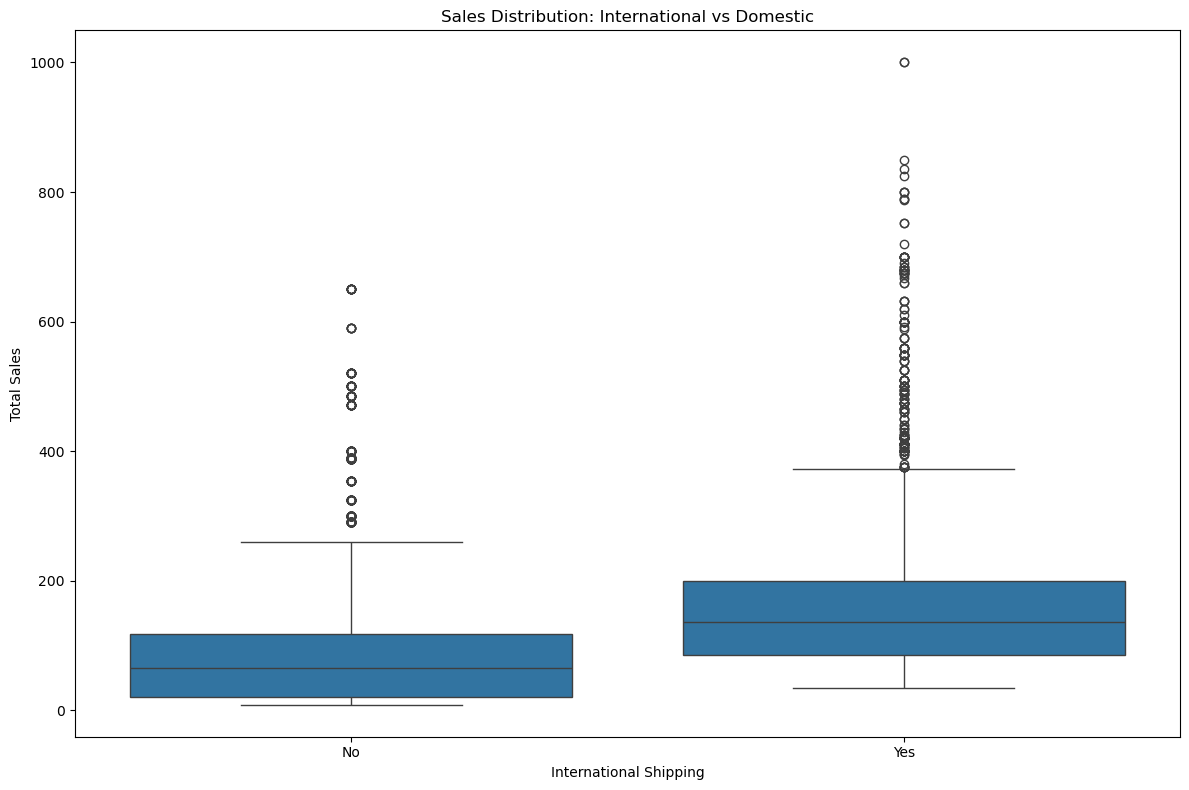

In [23]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='International Shipping', y='Total Sales')
plt.title('Sales Distribution: International vs Domestic')
plt.tight_layout()
plt.show()

The box plot visualization reveals a striking contrast between international and domestic sales patterns, highlighting the crucial role of global markets in the business model. The data presents a compelling case for the business's international market strategy's success and suggests promising directions for future growth.

International sales (marked as "Yes" in the plot) demonstrate notably higher values across all quartiles compared to domestic sales. The median line for international shipments sits substantially higher than that of domestic orders, indicating that the typical international order of the business generates greater revenue. This pattern might reflect several factors, including:

- Different purchasing behaviors in international markets, where customers might bundle more items per order to optimize shipping costs
- Potentially higher price points in international markets, accounting for shipping and market-specific factors
- Strong brand positioning in overseas markets, particularly evident in our success in locations like Sydney and Mumbai

The wider box and longer whiskers in the international sales distribution also indicate greater variability in order values. Several high-value outliers can be observed, with some international orders reaching nearly 1,000 in total sales, suggesting occasional large-volume purchases or premium product selections from international customers.

Domestic sales (marked as "No"), while more concentrated in the lower ranges, show a consistent pattern with fewer extreme variations. This could indicate more predictable purchasing patterns in the home market, possibly reflecting regular, smaller transactions rather than bulk orders.

Given these patterns, investing in strengthening the business's international presence appears to be a strategically sound decision. The data supports:
1. Further development of the international shipping infrastructure
2. Enhanced focus on markets showing strong performance, like Australia and India
3. Potential expansion into similar international markets that share characteristics with our current successful regions
   
This analysis reinforces the importance of maintaining and potentially expanding the business's international market strategy, as it represents not just a significant portion of it, but possibly its most lucrative market segment.

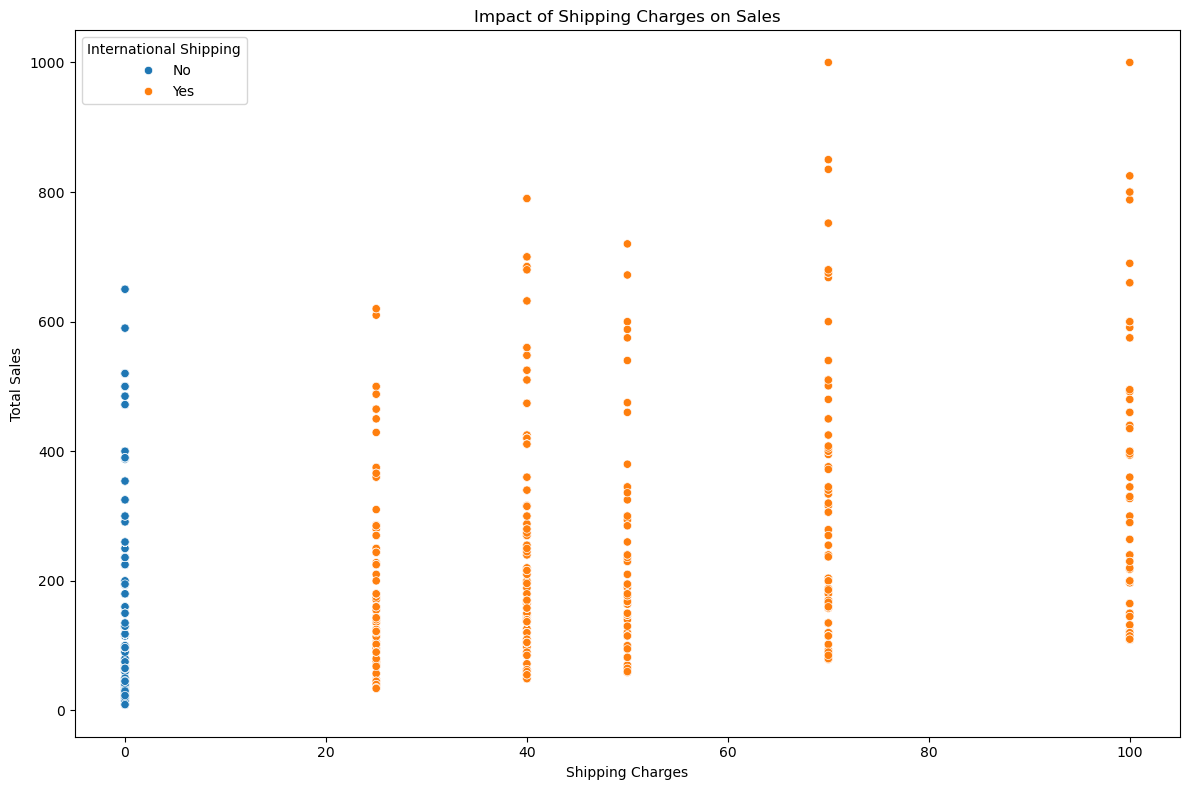

In [24]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='Shipping Charges', y='Total Sales', hue='International Shipping')
plt.title('Impact of Shipping Charges on Sales')
plt.tight_layout()
plt.show()

Looking at the distribution pattern, domestic shipments (shown in blue) cluster exclusively in the lowest shipping charge category, around the 
\\$5-20 range. This makes sense given the business's U.S. base of operations. However, what's particularly interesting is that even with these lower shipping costs, domestic sales values tend to remain in the moderate range, rarely exceeding \\$600 per order.

In contrast, international shipments (shown in orange) display a much more complex pattern. The data points spread across various shipping charge levels, ranging from approximately \\$20 to \\$100, creating distinct vertical clusters. This suggests a tiered shipping cost structure for international orders, possibly based on factors such as:
- Distance to destination
- Order weight or volume
- Specific regional shipping agreements
- Selected shipping speed or service level

A particularly noteworthy observation is that higher shipping charges don't appear to deter larger sales values. In fact, we see some of our highest-value sales (approaching \\$1000) occurring at various shipping price points, including the \\$60-80 and \\$100 ranges. This could indicate that:
1. International customers tend to maximize their orders to justify shipping costs
2. Our products maintain their value proposition even with added shipping expenses
3. Different markets might have different price sensitivities to shipping costs

The clear vertical banding in the international shipping charges suggests standardized shipping rates to specific regions or countries, rather than purely distance-based calculations. This structured approach to international shipping costs appears to be working well, as we see healthy sales values across all shipping charge tiers.

This visualization complements our previous findings about international sales strength and helps explain why international shipping has become such a crucial part of our business model. The data suggests that our current shipping charge structure, despite its higher costs for international customers, supports rather than hinders our global sales performance.